By:    Nathaniel Carballo
Date:  5/31/22



For this assignment, I was tasked with creating a supervised cluster algorithm and a unsupervised cluster algorithm.I started by browsing the article linked to help complete this assignement. I started with following the unsupervised cluster algorithm article and begin importing the libraries necessary to follow along with the instructions. This includes Pandas for organizing and analyzing the data set, NumPy for working with multidimensional arrays, Matlop to visualize NumPy computations, and Seaborn for statistical data visualization. 

I do note that I followed the article closely to ensure that I receieved the same results as what was shown. Even so, I had to change a few steps due to data not be available anymore. This was created with the help of that article, which will be posted in the reference area of this notebook.

In [1]:
# importing the necessary libraries for program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After importing the libraries, I loaded the titanic dataset into the application, then converted it from a .xlsx to .csv while creating a copy, allowing me to keep the original data in tack. I then call the variable assigned to the Titanic data in order to display the information within the dataset.

In [2]:
#load file 
read_file = pd.read_excel("Titanic.xlsx")

#convert file to csv
read_file.to_csv("Titanic.csv", index = None, header=True)

#assigning data to varible
df = pd.DataFrame(pd.read_csv("Titanic.csv"))

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Next I used an attribute associated with DataFrame that will allow me to view a summary of the data set showing information like the mean, min, and max of the data set columns. 

In [3]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Here I used another attribute associated with the DataFrame constructer. By using the attribute info, I can view various information such as column names, Non-Null Count, and the Dtype(data type) for each column. This can help gain quick insight on whether the data is clean, based on the non-null count and data type.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


I then used .isnull() attribute in order to add all the Null values together for each column and then display the total of each columns null values.

In [5]:
#finds and counts all NA, Null or NaN values
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

During this section of code, I filled the null values in the age column with median value of that column, which is 28. This can be seen in the table shown from df.describe() 50% row of the age column. I then call the dataset in order to view if the data has been properly changed. 

When doing this, I had a thought that this could alter the data and end up giving the user results that are not viable do to this change. I think personally I would have deleted the null entries instead of changing them to the median. This is because I feel like there could be many situations where a child is classified as a adult, or adult as a child.

In [6]:
#fills NA values in age with the current median value
df['age'] = df['age'].fillna(df['age'].median())

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


After changing the null values in the age column, the next values that would need to be changed were the null values in the fare column. I accomplished this using the same line of code used earlier for ages, just exchanging the variable names 'age with 'fare.

In [7]:
df['fare'] = df['fare'].fillna(df['fare'].median())

df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Here I group the survived column by whether they survived or not using 0 for not and 1 for did. I then counted each of those answers , which after I called the variable assigned to this method to display the list.

In [8]:
survived = df.groupby('survived').survived.count()
survived

survived
0    809
1    500
Name: survived, dtype: int64

This section takes the counts of the answers, and then converts them into a percentage. I then called the variable assigned to this method to display the results.

In [9]:
percent_survived = (survived / len(df)) * 100
percent_survived

survived
0    61.802903
1    38.197097
Name: survived, dtype: float64

Here I grab the count that was created ealier and displays the total numbers on a bar graph for easy comparison and visualization.

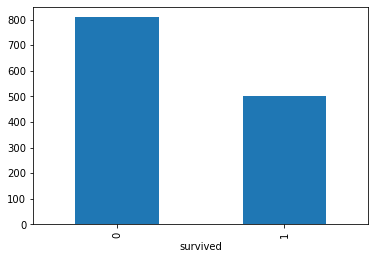

In [10]:
#plotting the column "survived" to a bar graph
df.groupby('survived').survived.count().plot.bar(ylim=0)
plt.show()

The following section repeats what was previously done with the survived column, but substitutes the survived data with the sex of each individual person. I start off with gathering a count of each male and female within the data set, the display the total. I then use that data and convert it to a percentage. I call the variable connected to the method to display the results. Final part of this section uses the gender data and creates a bar graph for easy comparisions and visualization.

In [11]:
sex = df.groupby('sex').survived.count()
sex

sex
female    466
male      843
Name: survived, dtype: int64

In [12]:
percent_sex = (sex / len(df)) * 100
percent_sex

sex
female    35.599694
male      64.400306
Name: survived, dtype: float64

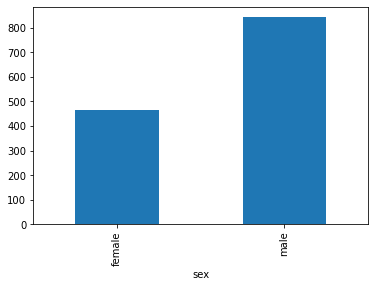

In [13]:
df.groupby('sex').survived.count().plot.bar(ylim=0)
plt.show()

This section also follows the same order as the previous two sections, except using the passenger class instead of gender or survival data. Start with gathering the all possible answers, then counting each answer. I then display the total count. Next I took the data and converted the total counts for each answer into a percentage. Last part was taking the data and creating a bar graph to help with visualization of the data.

In [14]:
pclass = df.groupby('pclass').survived.count()
pclass

pclass
1    323
2    277
3    709
Name: survived, dtype: int64

In [15]:
percent_class = (pclass / len(df)) * 100
percent_class

pclass
1    24.675325
2    21.161192
3    54.163484
Name: survived, dtype: float64

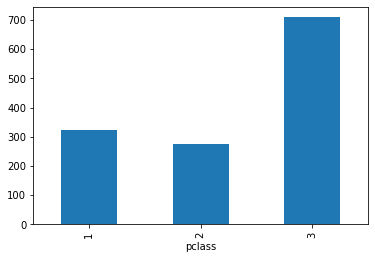

In [16]:
df.groupby('pclass').survived.count().plot.bar(ylim=0)
plt.show()

The next part of the assignment detailed creating a violin plot to show the frequency of the ages that were in the data set. A violin plot is used to show display the density of data in a graphical format (Yi, 2021).

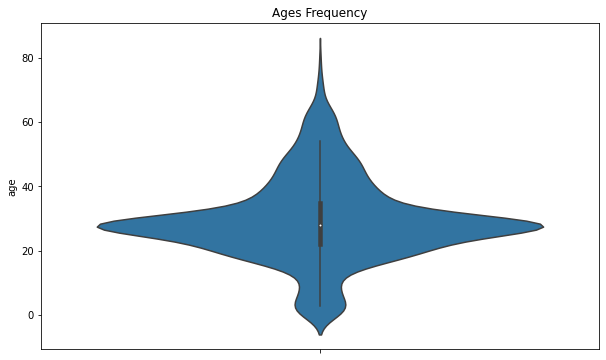

In [17]:
plt.figure(figsize=(10,6))  #graph Size
plt.title("Ages Frequency") #title of Graph
sns.axes_style("dark")      #color of axes words
sns.violinplot(y=df["age"]) #column of data
plt.show()

I then used different basic built in methods to pull specific data from the the dataset, such as the max value for the age column, or the minimal age presented in that column. I also pulled the median and the mode for the age column to see what results would be returned.

In [18]:
max_age = df.age.max()
max_age

80.0

In [19]:
min_age = df.age.min()
min_age

0.1667

In [20]:
median_age = df.age.median()
median_age

28.0

In [21]:
most_age = df.age.mode()
most_age

0    28.0
Name: age, dtype: float64

Here I created a violin graph to display the frequency of each fare price that showed up within the dataset. This will show the density of the certain fair prices in a graphical format(Yi, 2021).

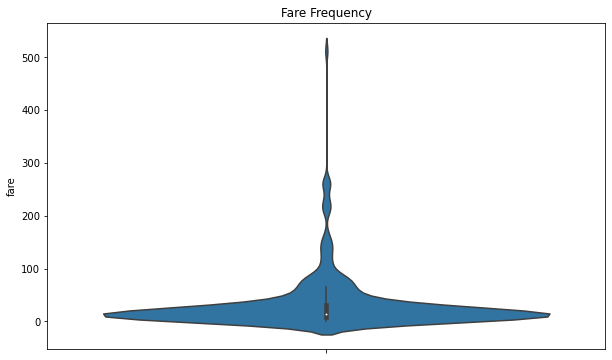

In [22]:
plt.figure(figsize=(10,6))    #graph size
plt.title("Fare Frequency")   #graph title
sns.axes_style("dark")        #color of axes words
sns.violinplot(y=df["fare"])  #column of data
plt.show()

Again I used basic built in functions to pull specific data from fare column within the data set to see what results would be returned. This data includes the max fare, the minimal fare, and the median fare.

In [23]:
max_fare = df.fare.max()
max_fare

512.3292

In [24]:
min_fare = df.fare.min()
min_fare

0.0

In [25]:
median_fare = df.fare.median()
median_fare

14.4542

In [26]:
most_fare = df.fare.mode()
most_fare

0    8.05
Name: fare, dtype: float64

In this part of the assignment, I created a scatter plot to display the relationship between the the age of the passenger and the amount they paid for their fare. A scatter plot allows two different numerical variables to be graphed on a 2-D plane so that the relationship between them can be better observed (YI, 2021).

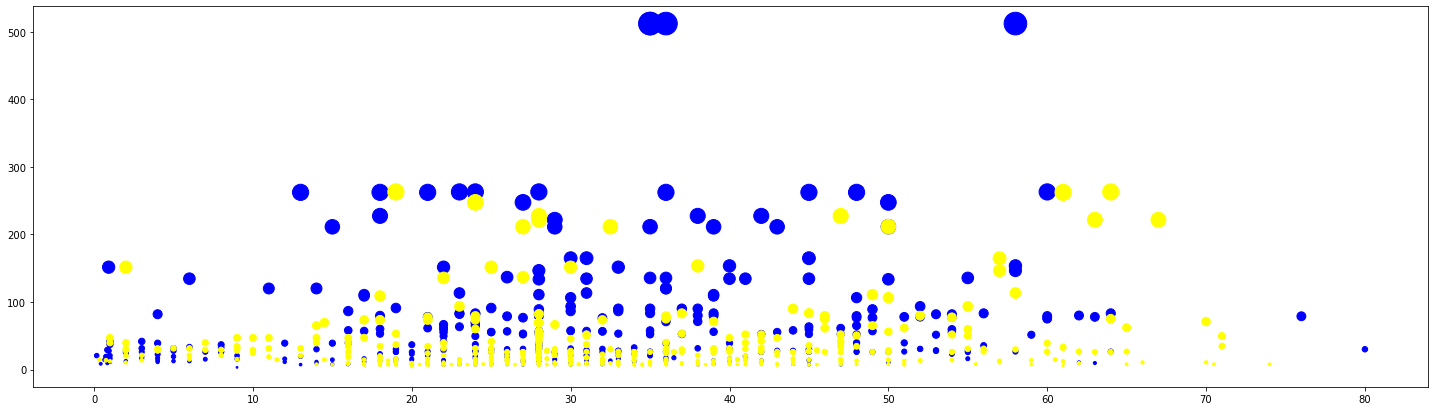

In [27]:
plt.figure(figsize=(25,7))
ax = plt.subplot()
ax.scatter(df[df['survived'] == 1]['age'], df[df['survived'] == 1]['fare'], c='blue', s=df[df['survived'] == 1]['fare'])
ax.scatter(df[df['survived'] == 0]['age'], df[df['survived'] == 0]['fare'], c='yellow', s=df[df['survived'] == 0]['fare']);


Next I create a variable called include with a method to include only data for passengers who survived the wreck. I then overwrite a variable called survived, which was previously used to store a method for counting survivors, this time it will be used in-junction with include to display only the passengers that survived the wreck.

In [28]:
#function to includes only rows who have values equal to 1 in their survived column.
include = df[df['survived'].values == 1]
survived = include
survived

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0000,0,0,4134,9.5875,NaN,S,15,NaN,NaN
1277,3,1,"Vartanian, Mr. David",male,22.0000,0,0,2658,7.2250,NaN,C,13 15,NaN,NaN
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0000,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN


I then created another variable using the previously created list that includes only survivors to count and display how many survivors were male and how many were female. I then converted the values into percentages and then placed the values into a bar graph. 

In [29]:
survived_sex = survived.groupby('sex').survived.count()
survived_sex

sex
female    339
male      161
Name: survived, dtype: int64

In [30]:
percent_survived_sex = (survived_sex / len(survived)) * 100
percent_survived_sex

sex
female    67.8
male      32.2
Name: survived, dtype: float64

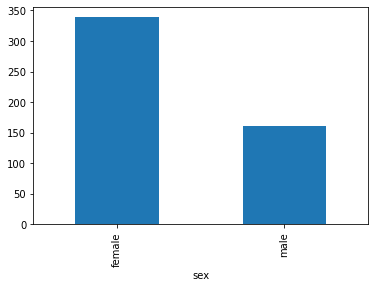

In [31]:
survived.groupby('sex').survived.count().plot.bar(ylim=0)
plt.show()

I follow the same steps as I did in the previous section except instead of using the gender of the passengers, I'll use the passengers class such as 1st class and 2 class passengers. I count each survivor and the passenger class they belonged to. I then take those values and convert them into percentages and the plot the values onto a bar graph.

In [32]:
survived_pclass = survived.groupby('pclass').survived.count()
survived_pclass

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

In [33]:
percent_survived_class = (survived_pclass / len(survived)) * 100
percent_survived_class

pclass
1    40.0
2    23.8
3    36.2
Name: survived, dtype: float64

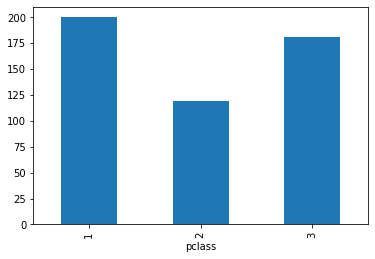

In [34]:
survived.groupby('pclass').survived.count().plot.bar(ylim=0)
plt.show()

In this section I created another violin graph depicting the density of the survived age. As I compared this graph to the earlier graph, I noticed very little changed. I think this has something to do with how null inputs were changed to the median value.

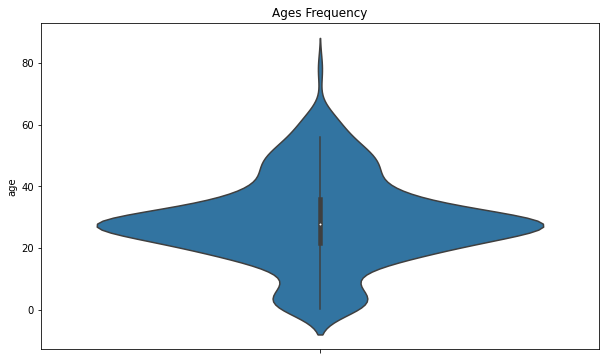

In [35]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=survived['age'])
plt.show()

Here I used basic built-in methods to pull values such as the max age, the minimal age, and the median age for the survivors.  

In [36]:
survived_max_age = survived.age.max()
survived_max_age

80.0

In [37]:
survived_min_age = survived.age.min()
survived_min_age

0.1667

In [38]:
survived_median_age = survived.age.median()
survived_median_age

28.0

In [39]:
survived_most_age = survived.age.mode()
survived_most_age

0    28.0
Name: age, dtype: float64

I do the same thing here as I did with the previous section. I create a violin plot to display the density of the fares that were paid among the survivors.

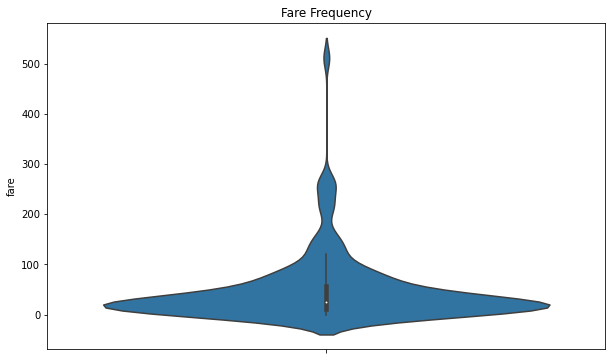

In [40]:
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=survived["fare"])
plt.show()

After creating the violin plot, I used basic built-in methods in order to pull certain values from the data, such as the max fare paid, lowest fare paid, and the median fare paid.

In [41]:
survived_max_fare = survived.fare.max()
survived_max_fare

512.3292

In [42]:
survived_min_fare = survived.fare.min()
survived_min_fare

0.0

In [43]:
survived_median_fare = survived.fare.median()
survived_median_fare

26.0

In [44]:
survived_mode_fare = survived.fare.mode()
survived_mode_fare

0    26.0
Name: fare, dtype: float64

In this part, a function was created to change the value under the sex column from male or female to 1 or 2. This is to convert the string datatype to a int type that way it can be manipulated later without causing errors. 

In [45]:
sex1 = {'male':1,'female':2}  #masking male and female to 1 and 2
df.sex = df.sex.map(sex1)

Right after, I converted the data types for the age and fare columns to integers as well, to better manipulate and use later without causing errors. Then I dropped all the data that would not be needed using their index number. This helps by filtering any unwanted outliers that could be left in the data set (Tableu, 2022). Last I called the dataset with the newly converted data types.

In [46]:
df.age = df.age.astype(int)     #changing datatype for age
df.fare = df.fare.astype(int)   #changing datatype for fare
df.drop(df.columns[[2, 5, 6, 7, 9, 10, 11, 12, 13]], axis=1, inplace=True)

df

,pclass,survived,sex,age,fare
0,1,1,2,29,211
1,1,1,1,0,151
2,1,0,2,2,151
3,1,0,1,30,151
4,1,0,2,25,151
...,...,...,...,...,...
1304,3,0,2,14,14
1305,3,0,2,28,14
1306,3,0,1,26,7
1307,3,0,1,27,7


For this step, I set the y independent variable as the survived column and the x dependent variables as the pclass, sex, age, and fare column.

In [47]:
y = df["survived"]    #independent variable
features = ["pclass", "sex", "age", "fare"]  #dependent variable
X = df[features]

Here I import StandardScaler from the sklearn library. This will allow me to scale the data as a method of preprocessing, to improve the results that I will receive from the machine learning algorithms (Scikit-learn, 2022). I then call the numpy shape method to get the dimensions of the array.

In [48]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X.shape

(1309, 4)

On this line, I called the methods mean and standard deviation using the variable np for numpy. This returns the average of the array elements while std(standard devidation) returns the measure for the spread of distributuion, of the array elements (NumPy, 2022).

In [49]:
np.mean(X), np.std(X)

(-9.227827737144159e-17, 1.0)

This line creates a variable called feat_cols which will print feature+index number for every feature that was detailed in line 47. I then call the variable to check the results.

In [50]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0', 'feature1', 'feature2', 'feature3']

Next is to normalize the data. This is a process that reorganizes the data in the database to enhance its usefulness. The process includes eliminating irregularities, along with organzing unstructured data into structured data (Selman et al., 2022).

In [51]:
normalized = pd.DataFrame(X,columns=feat_cols)
normalized

,feature0,feature1,feature2,feature3
0,-1.546098,1.344995,-0.037511,3.443743
1,-1.546098,-0.743497,-2.283521,2.283876
2,-1.546098,1.344995,-2.128624,2.283876
3,-1.546098,-0.743497,0.039937,2.283876
4,-1.546098,1.344995,-0.347306,2.283876
...,...,...,...,...
1304,0.841916,1.344995,-1.199241,-0.364485
1305,0.841916,1.344995,-0.114960,-0.364485
1306,0.841916,-0.743497,-0.269857,-0.499803
1307,0.841916,-0.743497,-0.192409,-0.499803


For this block of code, I import the PCA (Principle Component Analysis) from the sklearn library. This method takes the data from a high dimension space and moves it to a low dimension space while lossing a minimal amount of information during the transformation (Kumar, 2022).

In [52]:
from sklearn.decomposition import PCA

pca_insurance = PCA(n_components=2)
principalComponents_insurance = pca_insurance.fit_transform(X)

Next I used the PCA variables created in the last block along with the matplotlib.pyplot library to create a scatter plot.
The matplotlib.pyplot library is a MATLAB-like way of plotting and can also be used to open graphs on the screen (Matplotlib.pyplot, 2022).

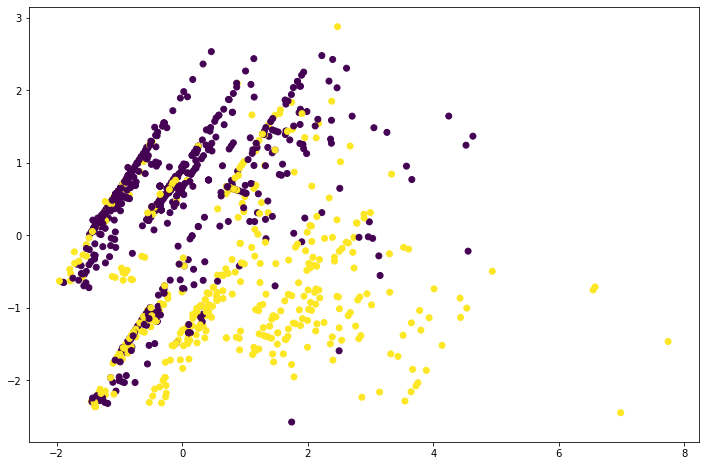

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(principalComponents_insurance[:, 0], principalComponents_insurance[:, 1], c = y, alpha = 1)

I then import the train_test_split method from the sklearn library and will allow me to split the dataset into two subset that can be used for training the model and testing the model. The returned values are the is a array containing the train-test split inputs.

In [54]:
#splitting dataset into 70 training and 30 test
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.03, shuffle=True, random_state=1, stratify=y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1269, 4), (1269,), (40, 4), (40,))

Here I import the RandomForestClassifier and the BaggingClassifier methods from the sklearn library. The RandomForestClassifier is a supervised learning algorithm that can be used for regression and classification (Vadapalli, 2022).  The BaggingClassifier meta-estimator that fits classifiers each on a random subsets of the original dataset then aggregate individual predictions to form a final prediction (Scikit-learn, 2022). I also print the score of the train variables. 

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(RandomForestClassifier(n_estimators=300, random_state=1, class_weight='balanced')).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.8896769109535066


In this line, I call the predict method to make predictions on the validation data, then print the score from the results the prediction run.

In [56]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.9


Next I import the confusion matrix method from the sklearn library. This will allow me to create an array that will display the values for True Negatives, True Positives, False Negatives, and False Positives.

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[22,  3],
       [ 1, 14]], dtype=int64)

This simple line of code creates a new data frame using the y_val and y_pred variables created earlier. Two columns are created labeled Actual and Predicted. Actual column are the actual data inputs from the original dataset. The predicted column are the data inputs generated from computer-generated predictions.

In [58]:
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df

,Actual,Predicted
205,0,0
1013,0,0
1010,0,0
747,0,1
114,0,0
585,0,0
1,1,1
284,1,1
906,0,0
976,0,0


For this section, I connect the X_val data set to the PCA variable along with calling the transform method. This will allow  for scaling of the training data. I also use the PCA variables along with the plt.scatter to create a scatter plot. This will allow me to better observe the relationship between data points.

In [59]:
pca_val = PCA(n_components=2)
principleComponents_val = pca_val.fit_transform(X_val)

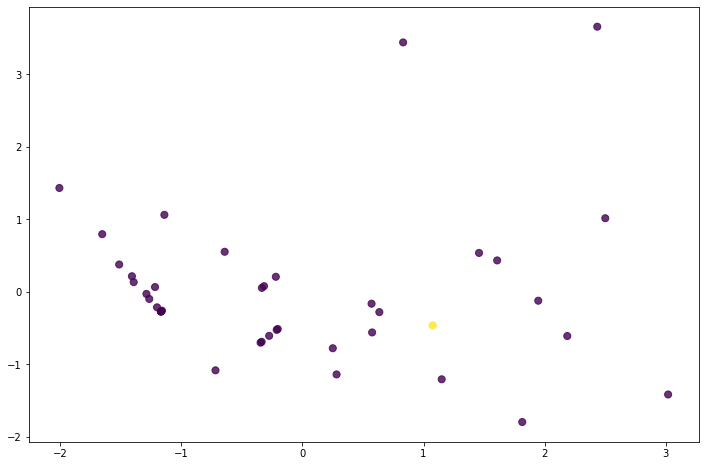

In [60]:
plt.figure(figsize = (12,8))
plt.scatter(principleComponents_val[:, 0], principleComponents_val[:, 1], c = y_pred == y_val - 1, alpha = .8, s = 50)

This simple line is used to normalize the X variable so it can be better used with the KMeans Clustering, which is an unsupervised learning algorithm (Predamkar, 2022).

In [61]:
X = (X.max() - X) / (X.max() - X.min())

Here I import the KMeans method within the sklearn.cluster library. I then set up the criteria for the cluster to be produced with and plug in the X variable that was normalized in the step before.

In [62]:
from sklearn.cluster import KMeans

kmeans = kmeans = KMeans(n_clusters = 2, max_iter=500, algorithm = 'auto',random_state=1)
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=2, random_state=1)

I then assign each row of data to a cluster and set the default value for correct to 0. Then I printed a dataframe displaying the 'actual' dataset next to the 'prediction' dataset.

In [63]:
correct = 0
prediction = kmeans.predict(X)
pred_df = pd.DataFrame({'actual': y, 'prediction': prediction})
print(pred_df)

      actual  prediction
0          1           0
1          1           0
2          0           0
3          0           0
4          0           0
...      ...         ...
1304       0           1
1305       0           1
1306       0           1
1307       0           1
1308       0           1

[1309 rows x 2 columns]


This block of code checks the predictions and then adds a count to a variable called correct everytime the prediction matches the 'actual' dataset. The total of the variable correct is then divided by the length of the actual dataset to return an accuracy score. I noted the accuracy score was noticably lower than prediction method used previously.

In [64]:
for i in range(len(y)):
    if prediction[i] == y[i]: #if prediction matches actual
        correct += 1          #add one to correct

print(correct/len(y))

0.3315508021390374


I imported the accuracy score method from sklearn.metrics library to verify that above accuracy score was correct.

In [65]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y, prediction)*100)

33.155080213903744


For this part of the assignment, I used a different dataset of the titanic. This would allow me to troubleshoot any issues I had a little faster due to having something to reference. Once the data is loaded, I print the first 10 rows of the new dataset.

In [66]:
titanic = sns.load_dataset('titanic')

titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


The next couple of lines are a few simple basic built-in methods to display various information. The first method is .shape, which returns the total rows and total columns of the dataset. The second method is the .describe method which displays various information, such as count, the standard deviation, and the max value for each column in the dataset.

In [67]:
titanic.shape

(891, 15)

In [68]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This line uses the value_counts method to count the number of people who survived and didnt survived, then display them into different rows based on those descriptors.

In [69]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

A simple block of code that uses countplot method of the seaborn library to plot the numbers for survived and didnt survive.

C:\Users\Nathaniel Carballo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

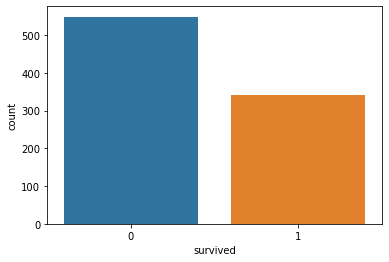

In [70]:
sns.countplot(titanic['survived'], label='count')

This section calls specific columns whos counts will be visualized on a bar graphs. These sections are detailed under the cols variable. n_rows and n_cols determines how the graphs will be organized for the user. A line is also included to traverse through the number of columns.

C:\Users\Nathaniel Carballo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nathaniel Carballo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nathaniel Carballo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

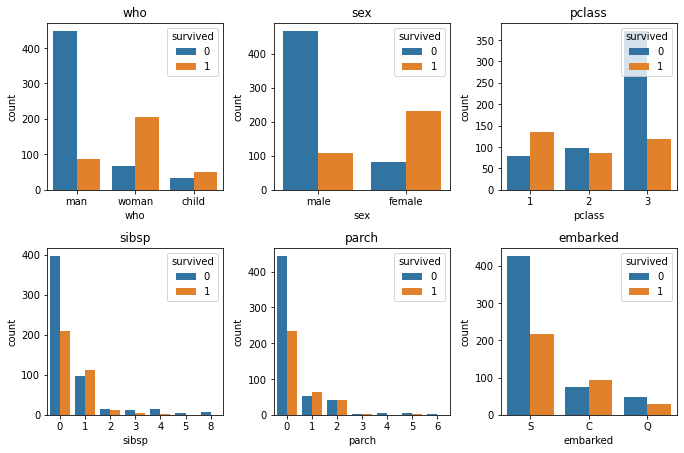

In [71]:
cols = ['who' , 'sex', 'pclass','sibsp', 'parch', 'embarked']

n_rows = 2   #rows of graphs
n_cols = 3   #columns of graphs

fig, axs = plt.subplots(n_rows , n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        
        i = r*n_cols+ c #index used to cycle through n number of columns
        ax = axs[r][c]  #shows where to place the graphs
        sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc='upper right')

plt.tight_layout()

The next two lines are simple and both use built-in methods to retrieve data. The first line retrieves the mean of survivors for male and females. The second line creates a table that displays the the mean of each passenger class for male and females.

In [72]:
titanic.groupby('sex')[['survived']].mean() #survival rate by gender

,survived
sex,
female,0.742038
male,0.188908


In [73]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This block creates a line graph that displays the trajectory of the data from the previous table in the line above.

<AxesSubplot:xlabel='sex'>

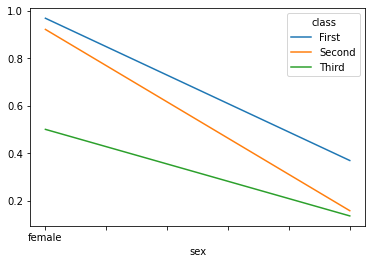

In [74]:
titanic.pivot_table('survived', index='sex', columns='class').plot()

This sections creates a bar graph to display the data but without gender label involved. This strictly shows the classes and the number of survivors per class.

<AxesSubplot:xlabel='class', ylabel='survived'>

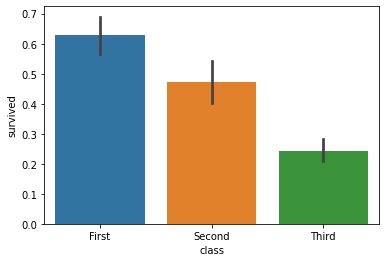

In [75]:
sns.barplot(x='class', y='survived', data=titanic)

Here three age groups are created and the dataset is cut based on these age groups. A table is then created to show different values per age group and passenger class.

In [76]:
age = pd.cut(titanic['age'], [0, 18, 80]) #seperates age column into 2 sub groups
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

For this block, a scatter plot was created to display the relationship between the amount of people per passenger class in relations to the prices they paid.

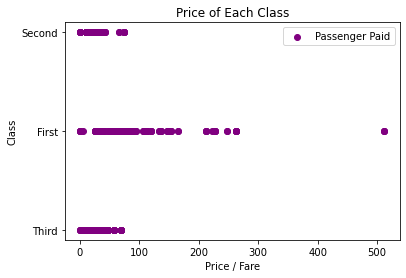

In [77]:
plt.scatter(titanic['fare'], titanic['class'], color = 'purple', label = 'Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

A simple line that returns the sum of all Null or missing values in each column

In [78]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Here a for loop is called and it states for every value in titanic, print the value name along with the total count for that value, name of the column, and the data type of that column.

In [79]:
#grabs count of all values from each column
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In this block of code, data is dropped that can be considered redundant and unnecessary. Data that is non-numerical is also dropped. Then all NA values are dropped from the columns embarked and age.

In [80]:
#remove these columns from dataset
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)
#remove NA(null) values from columns
titanic = titanic.dropna(subset =['embarked', 'age'])

This line prints the new shape of the data set. This includes the total rows and columns in the dataset.

In [81]:
titanic.shape

(712, 8)

A quick line to show each data type for the columns in the dataset.

In [82]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

Both lines here are used to print the unique values present in the columns given as the arguments.

In [83]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


Here I imported the LabelEncoder from the sklearn.preprocessing library in order to change the object data types of the columns sex and embarked to interger data types. LabelEncoder transforms non-numerical values to integers based on the amount of unique values. Here its encoded into the columns sex and embarked, then the new numerical values are printed to verify that the conversion is done correctly (Scikit-learn, 2022).

In [84]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#transforming age column using column index
titanic.iloc[:,2]=labelencoder.fit_transform(titanic.iloc[:,2].values)

#transforming embarked column using column index
titanic.iloc[:,7]=labelencoder.fit_transform(titanic.iloc[:,7].values)


print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


This line splits the data to two categories: independent and depented. X will be independent while Y is dependent

In [85]:
X = titanic.iloc[:, 1:8].values #independent value
Y = titanic.iloc[:, 0].values   #dependent value

Here I'm splitting the data again but this time into training and testing data sets. I'll use 80% for training size and 20% for testing.

In [86]:
#splitting dataset 80 training 20 test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 0)

Here I'm setting the scale for the data to standardize the features. This is in hope of gaining better results.

In [87]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

This section contains multiple different machine learning models. This was done to see the different results of each machine learning model using the same data sets. By defining them under one variable, I can feed them the data sets and receive results from all of them at once.

In [88]:
#creating a class with multple machine learning models within it
def models(X_train,Y_train):
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Liner Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Trining Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    #returning results from each Machin learning model
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

I then call the variable that holds the many different machine learning algorithms and feed it the X_train dataset along with the Y_train dataset.

In [89]:
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2]Support Vector Machine (Liner Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4]Gaussian Naive Bayes Trining Accuracy: 0.8031634446397188
[5]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6]Random Forest Classifier Training Accuracy: 0.9753954305799648


This block shows the confusion matrix and accuracy for all models using the test datasets. Here accuracy is calculated by adding true positive with true negative then dividing the total from the total of true negative, true positive, false negative, and false positive.

In [90]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    #pulls TN, FP, FN, TP from confusion matrix for calculating the accuracy score
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    print(cm)
    
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
    print()

[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111 !"

[[71 11]
 [20 41]]
Model[1] Testing Accuracy = "0.7832167832167832 !"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902 !"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972 !"

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482 !"

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763 !"

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042 !"



After running both test, I noticed the score of the Random Forest were almost the best in both categories with a accuracy score of 97% for the train set and 80% for the test set. Next was to find the importance of each feature. This allows me to determine which features are most important to the dataset and is done by calculating the mean and standard deviation of the data. Finding the importance of data helps in determining which data will be most helpful toward the final goal (ai, 2021).

In [91]:
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns, 'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


Here the importance values from the previous block are displayed in bar graph format.

<AxesSubplot:xlabel='feature'>

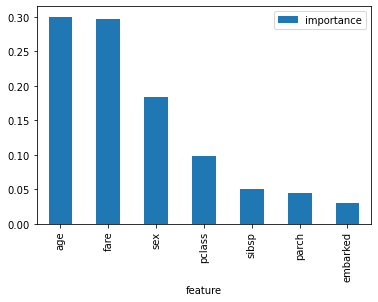

In [92]:
importances.plot.bar()

This line prints the predictions of the Random Forest Classifier model so it can be seen visually and determined how well it did on predicting the test data.

In [93]:
pred = model[6].predict(X_test)
print(pred)

print()

print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


Here I created a small block of code that will take my information and determine whether i would survive the titanic based on my inputs.
The inputs are placed in this order based on columns : pclass, sex, age, sibsp, parch, fare, embarked.

In [ ]:
my_survival = [[3,1,28,1,1,0,1]]

pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
    print('Oh no! You didnt survive the titanic')
else:
    print('Dude! You survived the titanic!')

Summary:
    For this assignment, I followed along two different articles implementing many different solutions that were shown in order to evaluate data. I then cleaned both datasets and then created both supervised and unsupervised machine learning algorithms to describe the data and predict survival. I also tested many different methods and view data in many different ways. This was my first time using jupyter notebook and I have to say I'm very impressed. I'm very likely to continue to use this even after the end of the course.

References

., M. (2022). Matplotlib.pyplot. matplotlib.pyplot - Matplotlib 3.5.2 documentation. Retrieved June 3, 2022, from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html 

., N. P. Y. (2022). Statistics¶. Statistics - NumPy v1.22 Manual. Retrieved June 3, 2022, from https://numpy.org/doc/stable/reference/routines.statistics.html 

., T. (2022). Guide to data cleaning: Definition, benefits, components, and how to clean your data. Tableau. Retrieved June 3, 2022, from https://www.tableau.com/learn/articles/what-is-data-cleaning 

112358, R. (2022, April 9). Titanic survival prediction using machine learning. Medium. Retrieved June 3, 2022, from https://betterprogramming.pub/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16 

ai, Z. (2021, September 26). Random Forest for feature importance. Medium. Retrieved June 3, 2022, from https://towardsdatascience.com/random-forest-for-feature-importance-ea90852b8fc5 

Kumar, V. (2022, February 6). Complete tutorial of PCA in python Sklearn with example. MLK - Machine Learning Knowledge. Retrieved June 3, 2022, from https://machinelearningknowledge.ai/complete-tutorial-for-pca-in-python-sklearn-with-example/#3_What_is_PCA 

learn, S. (2022). Sklearn.ensemble.BaggingClassifier. scikit. Retrieved June 3, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 

learn, S. (2022). Sklearn.preprocessing.LabelEncoder. scikit. Retrieved June 3, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html 

learn, scikit. (2022). Sklearn.preprocessing.StandardScaler. scikit. Retrieved June 3, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

Predamkar, P. (2022, February 7). K- means clustering algorithm: HOW IT WORKS: Analysis &amp; implementation. EDUCBA. Retrieved June 3, 2022, from https://www.educba.com/k-means-clustering-algorithm/ 

Renee, T. (2021, July 22). Using KMEANS clustering to predict survivors of the Titanic. Medium. Retrieved June 3, 2022, from https://medium.com/mlearning-ai/using-kmeans-clustering-to-predict-survivors-of-the-titanic-ae3d3e959eb8 

Selman, H., Taylor, K., &amp; Wiggers, K. (2022, April 25). What does it mean that data is normalized? Dataconomy. Retrieved June 3, 2022, from https://dataconomy.com/2022/04/what-does-it-mean-that-data-is-normalized/ 

Vadapalli, P. (2022, April 18). Random forest classifier: Overview, how does it work, pros &amp; cons. upGrad blog. Retrieved June 3, 2022, from https://www.upgrad.com/blog/random-forest-classifier/#Random_Forest_Classifier_An_Introduction 

YI, M. (2021). A complete guide to scatter plots. Chartio. Retrieved June 3, 2022, from https://chartio.com/learn/charts/what-is-a-scatter-plot/ 

Yi, M. (2021). A complete guide to violin plots. Chartio. Retrieved June 3, 2022, from https://chartio.com/learn/charts/violin-plot-complete-guide/ 